# Analyse Exploratoire et Nettoyage des Données

**Objectif :** Comprendre la structure, la qualité et la distribution des données pour identifier tendances, anomalies et préparer le nettoyage.

**Auteur :** TAGBA Gracia-Josaphat Ewazam

## 1. Imports et Configurations

On importe les fichiers et on configure pandas pour formater l'affichage des valeurs

In [1]:
# Imports
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Configuration pandas pour meilleur affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## 2. Chargement des Données

On Charge les 8 fichiers CSV. Utilisons try/except pour gérer les erreurs de chargement. Encodage UTF-8 pour les accents français. Puis afficher aussi les dimensisons des fichiers chargés

In [2]:
# Chargement des données
data_files = {
    'demandes_service_public': '../data/demandes_service_public.csv',
    'documents_administratifs_ext': '../data/documents_administratifs_ext.csv',
    'centres_service': '../data/centres_service.csv',
    'details_communes': '../data/details_communes.csv',
    'donnees_socioeconomiques': '../data/donnees_socioeconomiques.csv',
    'logs_activite': '../data/logs_activite.csv',
    'developpement': '../data/developpement.csv',
    'reseau_routier': '../data/reseau_routier_togo_ext.csv'
}

datasets = {}
for name, path in data_files.items():
    try:
        datasets[name] = pd.read_csv(path, encoding='utf-8')
        print(f"✓ {name}: {datasets[name].shape[0]} lignes, {datasets[name].shape[1]} colonnes")
    except Exception as e:
        print(f"✗ Erreur de chargement {name}: {e}")

✓ demandes_service_public: 600 lignes, 16 colonnes
✓ documents_administratifs_ext: 64 lignes, 9 colonnes
✓ centres_service: 55 lignes, 16 colonnes
✓ details_communes: 200 lignes, 13 colonnes
✓ donnees_socioeconomiques: 115 lignes, 11 colonnes
✓ logs_activite: 450 lignes, 14 colonnes
✓ developpement: 33 lignes, 15 colonnes
✓ reseau_routier: 40 lignes, 14 colonnes


## 3. Description Générale des Jeux de Données


Pour chaque dataset, on affiche :
- Dimensions (lignes x colonnes)
- Types de variables (dtypes)
- Statistiques descriptives de base (pour numériques)
- Aperçu des premières lignes

Cela nous permettra de comprendre la structure des fichiers et identifier les colonnes clés

In [3]:
# Description des données
for name, df in datasets.items():
    print(f"\n=== {name.upper()} ===")
    print(f"Dimensions: {df.shape}")
    print("\nTypes de variables:")
    print(df.dtypes)
    print("\nAperçu (5 premières lignes):")
    display(df.head())
    print("\nStatistiques descriptives:")
    display(df.describe())
    print("-" * 100)


=== DEMANDES_SERVICE_PUBLIC ===
Dimensions: (600, 16)

Types de variables:
demande_id                 object
region                     object
prefecture                 object
commune                    object
quartier                   object
type_document              object
categorie_document         object
nombre_demandes             int64
delai_traitement_jours      int64
taux_rejet                float64
date_demande               object
motif_demande              object
statut_demande             object
canal_demande              object
age_demandeur               int64
sexe_demandeur             object
dtype: object

Aperçu (5 premières lignes):


,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur
0,D001,Centrale,Sotouboua,Sotouboua,Nyékonakpoé,Carte d'identité,Identité,168,1,0.00,2023-09-30,Perte,Rejetée,En ligne,27,M
1,D002,Kara,Binah,Pagouda,Hôpital,Carte d'identité,Identité,17,22,0.09,2023-12-22,Vol,Traitee,En ligne,21,F
2,D003,Plateaux,Ogou,Atakpamé,Bè,Certificat de nationalité,Identité,104,4,0.08,2023-08-13,Concours,Traitee,En ligne,18,M
3,D004,Savanes,Oti,Mango,Amoutivé,Carte d'identité,Identité,92,39,0.02,2023-06-08,Première demande,Rejetée,Guichet,64,M
4,D005,Maritime,Zio,Tsévié,Adidogomé,Livre de famille,Civil,138,7,0.12,2023-02-02,Détérioration,Rejetée,En ligne,30,M



Statistiques descriptives:


,nombre_demandes,delai_traitement_jours,taux_rejet,age_demandeur
count,600.00,600.00,600.00,600.00
mean,108.17,22.72,0.07,53.34
std,56.19,13.02,0.04,20.87
min,10.00,1.00,0.00,18.00
25%,59.00,12.00,0.04,36.00
50%,110.00,22.00,0.07,53.00
75%,158.00,34.00,0.11,70.00
max,200.00,45.00,0.15,90.00


----------------------------------------------------------------------------------------------------

=== DOCUMENTS_ADMINISTRATIFS_EXT ===
Dimensions: (64, 9)

Types de variables:
annee                  int64
mois                   int64
region                object
prefecture            object
commune               object
type_document         object
nombre_demandes        int64
delai_moyen_jours    float64
taux_rejet_moyen     float64
dtype: object

Aperçu (5 premières lignes):


,annee,mois,region,prefecture,commune,type_document,nombre_demandes,delai_moyen_jours,taux_rejet_moyen
0,2023,1,Maritime,Vo,Lomé,Carte d'identité,2450,12.50,0.05
1,2023,1,Maritime,Vo,Lomé,Passeport,1650,25.20,0.08
2,2023,1,Maritime,Vo,Lomé,Acte de naissance,890,10.10,0.02
3,2023,1,Maritime,Vo,Lomé,Livre de famille,620,15.30,0.03
4,2023,1,Maritime,Lacs,Aného,Carte d'identité,1250,14.50,0.04



Statistiques descriptives:


,annee,mois,nombre_demandes,delai_moyen_jours,taux_rejet_moyen
count,64.00,64.00,64.00,64.00,64.00
mean,2023.31,1.62,755.31,19.17,0.06
std,0.47,0.93,606.12,6.85,0.03
min,2023.00,1.00,160.00,9.20,0.02
25%,2023.00,1.00,310.00,14.07,0.04
50%,2023.00,1.00,575.00,17.40,0.06
75%,2024.00,3.00,927.50,22.48,0.08
max,2024.00,3.00,2700.00,34.50,0.13


----------------------------------------------------------------------------------------------------

=== CENTRES_SERVICE ===
Dimensions: (55, 16)

Types de variables:
centre_id                   object
nom_centre                  object
type_centre                 object
region                      object
prefecture                  object
commune                     object
quartier                    object
latitude                   float64
longitude                  float64
personnel_capacite_jour      int64
nombre_guichets              int64
heures_ouverture            object
horaire_nuit                object
equipement_numerique        object
date_ouverture              object
statut_centre               object
dtype: object

Aperçu (5 premières lignes):


,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre
0,CT001,Centre Principal Dapaong,Principal,Savanes,Tône,Dapaong,Administratif,10.59,0.47,300,12,07:30-17:30,Non,Complet,2016-02-14,Actif
1,CT002,Centre Kévé,Secondaire,Maritime,Ave,Kévé,Zone industrielle,6.28,1.22,63,2,08:00-16:00,Non,Limite,2020-09-14,Actif
2,CT003,Centre Gando,Secondaire,Savanes,Oti-Sud,Gando,Zone industrielle,10.26,0.25,98,2,08:00-16:00,Non,Partiel,2015-06-02,Actif
3,CT004,Centre Pagouda,Secondaire,Kara,Binah,Pagouda,Gare routière,9.42,1.17,78,6,08:00-16:00,Non,Partiel,2019-12-03,Actif
4,CT005,Centre Tchamba,Secondaire,Centrale,Tchamba,Tchamba,Carrefour,8.50,1.00,62,3,08:00-16:00,Non,Limite,2022-10-20,Actif



Statistiques descriptives:


,latitude,longitude,personnel_capacite_jour,nombre_guichets
count,55.00,55.00,55.00,55.00
mean,8.35,1.06,126.42,5.33
std,1.49,0.34,95.72,3.56
min,6.21,0.10,32.00,2.00
25%,6.59,0.84,63.00,2.00
50%,8.69,1.13,88.00,5.00
75%,9.42,1.30,116.50,6.00
max,11.00,1.68,358.00,14.00


----------------------------------------------------------------------------------------------------

=== DETAILS_COMMUNES ===
Dimensions: (200, 13)

Types de variables:
commune_id               object
commune                  object
prefecture               object
region                   object
latitude                float64
longitude               float64
altitude_m                int64
superficie_km2            int64
population_densite        int64
code_postal              object
type_commune             object
distance_capitale_km      int64
zone_climatique          object
dtype: object

Aperçu (5 premières lignes):


,commune_id,commune,prefecture,region,latitude,longitude,altitude_m,superficie_km2,population_densite,code_postal,type_commune,distance_capitale_km,zone_climatique
0,COM001,Vogan,Vo,Maritime,6.23,1.50,19,343,35,BP 272,Rurale,34,Côtière
1,COM002,Hahotoé,Vo,Maritime,6.69,1.66,39,398,210,BP 239,Semi-urbaine,79,Côtière
2,COM003,Anyronkopé,Vo,Maritime,6.42,1.24,47,215,76,BP 495,Rurale,31,Côtière
3,COM004,Momé,Vo,Maritime,6.20,1.62,41,230,95,BP 60,Rurale,45,Côtière
4,COM005,Dagbati,Vo,Maritime,6.31,1.65,25,318,58,BP 235,Rurale,52,Côtière



Statistiques descriptives:


,latitude,longitude,altitude_m,superficie_km2,population_densite,distance_capitale_km
count,200.00,200.00,200.00,200.00,200.00,200.00
mean,8.15,1.06,290.52,362.88,208.61,229.72
std,1.51,0.37,205.52,130.18,569.70,166.39
min,6.11,0.01,8.00,102.00,20.00,3.00
25%,6.65,0.84,67.00,249.75,43.75,67.25
50%,7.76,1.15,283.50,351.50,77.00,183.50
75%,9.56,1.31,443.50,479.00,155.25,381.00
max,11.03,1.69,783.00,600.00,4690.00,556.00


----------------------------------------------------------------------------------------------------

=== DONNEES_SOCIOECONOMIQUES ===
Dimensions: (115, 11)

Types de variables:
region                   object
prefecture               object
commune                  object
population                int64
superficie_km2            int64
densite                   int64
taux_urbanisation       float64
taux_alphabétisation    float64
age_median                int64
nombre_menages            int64
revenu_moyen_fcfa         int64
dtype: object

Aperçu (5 premières lignes):


,region,prefecture,commune,population,superficie_km2,densite,taux_urbanisation,taux_alphabétisation,age_median,nombre_menages,revenu_moyen_fcfa
0,Maritime,Vo,Vogan,48777,478,102,0.33,0.76,19,8590,78348
1,Maritime,Vo,Hahotoé,13939,444,31,0.35,0.66,21,3973,112380
2,Maritime,Vo,Anyronkopé,23395,355,65,0.18,0.72,21,4534,107120
3,Maritime,Vo,Momé,19379,302,64,0.10,0.81,22,4207,99265
4,Maritime,Vo,Dagbati,14846,309,48,0.32,0.79,22,3170,133012



Statistiques descriptives:


,population,superficie_km2,densite,taux_urbanisation,taux_alphabétisation,age_median,nombre_menages,revenu_moyen_fcfa
count,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00
mean,50971.29,266.01,290.57,0.33,0.65,21.54,10259.46,133782.71
std,49819.73,136.53,311.04,0.20,0.09,2.07,9588.46,55010.11
min,8843.00,50.00,19.00,0.10,0.47,18.00,1616.00,69126.00
25%,26074.00,149.00,80.50,0.19,0.59,20.00,5362.50,98436.50
50%,42202.00,267.00,140.00,0.29,0.64,22.00,8417.00,121278.00
75%,54761.50,384.50,404.00,0.36,0.73,23.00,11394.50,146409.00
max,424644.00,499.00,1759.00,0.95,0.86,25.00,71055.00,372987.00


----------------------------------------------------------------------------------------------------

=== LOGS_ACTIVITE ===
Dimensions: (450, 14)

Types de variables:
log_id                         object
centre_id                      object
date_operation                 object
type_operation                 object
type_document                  object
nombre_traite                   int64
delai_effectif                  int64
nombre_rejete                   int64
raison_rejet                   object
personnel_present               int64
temps_attente_moyen_minutes     int64
incident_technique             object
heure_debut                    object
heure_fin                      object
dtype: object

Aperçu (5 premières lignes):


,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin
0,LOG001,CT015,2023-10-30,Traitement,Carte d'identité,241,41,31,Non éligible,15,58,Non,08:00,16:00
1,LOG002,CT026,2023-04-21,Maintenance,NaN,0,0,0,NaN,12,0,Non,09:00,19:00
2,LOG003,CT049,2023-08-22,Traitement,Livre de famille,62,19,0,NaN,12,95,Non,08:30,17:30
3,LOG004,CT047,2023-07-13,Traitement,Acte de naissance,139,22,12,Double demande,7,54,Non,08:15,16:15
4,LOG005,CT008,2023-04-08,Traitement,Passeport,71,35,6,Double demande,13,94,Oui,08:30,17:30



Statistiques descriptives:


,nombre_traite,delai_effectif,nombre_rejete,personnel_present,temps_attente_moyen_minutes
count,450.00,450.00,450.00,450.00,450.00
mean,85.55,20.73,6.46,8.29,52.02
std,79.21,14.39,8.01,4.02,37.88
min,0.00,0.00,0.00,2.00,0.00
25%,30.25,8.00,1.00,5.00,18.25
50%,66.00,21.00,4.00,8.00,48.50
75%,100.00,34.00,8.00,12.00,86.00
max,297.00,45.00,43.00,15.00,120.00


----------------------------------------------------------------------------------------------------

=== DEVELOPPEMENT ===
Dimensions: (33, 15)

Types de variables:
region                    object
prefecture                object
commune                   object
pib_par_habitant_fcfa      int64
taux_chomage             float64
taux_pauvrete            float64
acces_electricite        float64
acces_eau_potable        float64
acces_internet           float64
indice_developpement     float64
score_education          float64
score_sante              float64
nombre_ecoles              int64
nombre_hopitaux            int64
nombre_banques             int64
dtype: object

Aperçu (5 premières lignes):


,region,prefecture,commune,pib_par_habitant_fcfa,taux_chomage,taux_pauvrete,acces_electricite,acces_eau_potable,acces_internet,indice_developpement,score_education,score_sante,nombre_ecoles,nombre_hopitaux,nombre_banques
0,Maritime,Vo,Lomé,860000,0.11,0.24,0.96,0.93,0.67,0.74,0.79,0.76,250,19,48
1,Maritime,Vo,Adakpamé,830000,0.12,0.26,0.94,0.91,0.63,0.71,0.77,0.74,220,16,40
2,Maritime,Golfe,Bè,720000,0.13,0.27,0.92,0.89,0.60,0.69,0.75,0.73,190,13,30
3,Maritime,Golfe,Agoè,700000,0.14,0.29,0.91,0.88,0.58,0.67,0.73,0.71,175,12,26
4,Maritime,Lacs,Aného,560000,0.16,0.31,0.86,0.83,0.46,0.63,0.69,0.66,98,6,16



Statistiques descriptives:


,pib_par_habitant_fcfa,taux_chomage,taux_pauvrete,acces_electricite,acces_eau_potable,acces_internet,indice_developpement,score_education,score_sante,nombre_ecoles,nombre_hopitaux,nombre_banques
count,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00
mean,548787.88,0.20,0.40,0.80,0.77,0.36,0.57,0.63,0.60,90.42,5.27,14.42
std,108707.11,0.05,0.09,0.08,0.07,0.12,0.07,0.07,0.07,49.89,4.19,9.78
min,410000.00,0.11,0.24,0.66,0.63,0.21,0.46,0.51,0.49,44.00,2.00,5.00
25%,480000.00,0.17,0.34,0.74,0.71,0.26,0.52,0.57,0.55,60.00,3.00,8.00
50%,520000.00,0.20,0.39,0.79,0.76,0.33,0.56,0.61,0.59,74.00,4.00,12.00
75%,590000.00,0.24,0.47,0.85,0.82,0.42,0.62,0.67,0.64,98.00,6.00,16.00
max,860000.00,0.30,0.59,0.96,0.93,0.67,0.74,0.79,0.76,250.00,19.00,48.00


----------------------------------------------------------------------------------------------------

=== RESEAU_ROUTIER ===
Dimensions: (40, 14)

Types de variables:
route_id                   object
type_route                 object
nom_route                  object
region_origine             object
region_destination         object
prefecture_origine         object
prefecture_destination     object
longueur_km                 int64
etat_route                 object
temps_parcours_heures     float64
points_controle             int64
bus_par_jour                int64
camions_par_jour            int64
passagers_par_jour          int64
dtype: object

Aperçu (5 premières lignes):


,route_id,type_route,nom_route,region_origine,region_destination,prefecture_origine,prefecture_destination,longueur_km,etat_route,temps_parcours_heures,points_controle,bus_par_jour,camions_par_jour,passagers_par_jour
0,R001,Nationale,RN1,Maritime,Plateaux,Vo,Ogou,150,Bon,2.50,3,85,45,1250
1,R002,Nationale,RN2,Plateaux,Centrale,Ogou,Sotouboua,120,Moyen,2.80,2,65,35,950
2,R003,Nationale,RN3,Centrale,Kara,Sotouboua,Kozah,110,Moyen,2.60,2,60,30,850
3,R004,Nationale,RN4,Kara,Savanes,Kozah,Oti,95,Mediocre,3.00,2,45,25,650
4,R005,Nationale,RN5,Maritime,Kara,Vo,Kozah,420,Moyen,8.50,6,70,55,1600



Statistiques descriptives:


,longueur_km,temps_parcours_heures,points_controle,bus_par_jour,camions_par_jour,passagers_par_jour
count,40.00,40.00,40.00,40.00,40.00,40.00
mean,99.72,2.29,1.50,75.28,19.62,1157.00
std,86.30,1.90,1.47,33.23,13.56,459.82
min,18.00,0.40,0.00,35.00,3.00,550.00
25%,45.00,1.08,0.00,55.00,9.00,850.00
50%,70.00,1.65,1.00,66.50,15.50,1025.00
75%,121.25,2.80,2.00,90.00,25.00,1412.50
max,420.00,8.50,6.00,180.00,55.00,2500.00


----------------------------------------------------------------------------------------------------


## 4. Analyse des Valeurs Manquantes, Aberrantes et Doublons

A cette etape, on identifie les problèmes liés à la qualité des données


=== DEMANDES_SERVICE_PUBLIC ===
Valeurs manquantes (%):
Series([], dtype: float64)


Doublons: 0
----------------------------------------------------------------------------------------------------

=== DOCUMENTS_ADMINISTRATIFS_EXT ===
Valeurs manquantes (%):
Series([], dtype: float64)
Doublons: 0
Outliers nombre_demandes: 4 (limites: -616.25 - 1853.75)
----------------------------------------------------------------------------------------------------

=== CENTRES_SERVICE ===
Valeurs manquantes (%):
Series([], dtype: float64)
Doublons: 0
Outliers longitude: 1 (limites: 0.16 - 1.98)
Outliers personnel_capacite_jour: 12 (limites: -17.25 - 196.75)
Outliers nombre_guichets: 4 (limites: -4.00 - 12.00)
----------------------------------------------------------------------------------------------------

=== DETAILS_COMMUNES ===
Valeurs manquantes (%):
Series([], dtype: float64)
Doublons: 0
Outliers longitude: 3 (limites: 0.13 - 2.03)
Outliers population_densite: 20 (limites: -123.50 - 322.50)
-----------------------------------------------------------------------------------

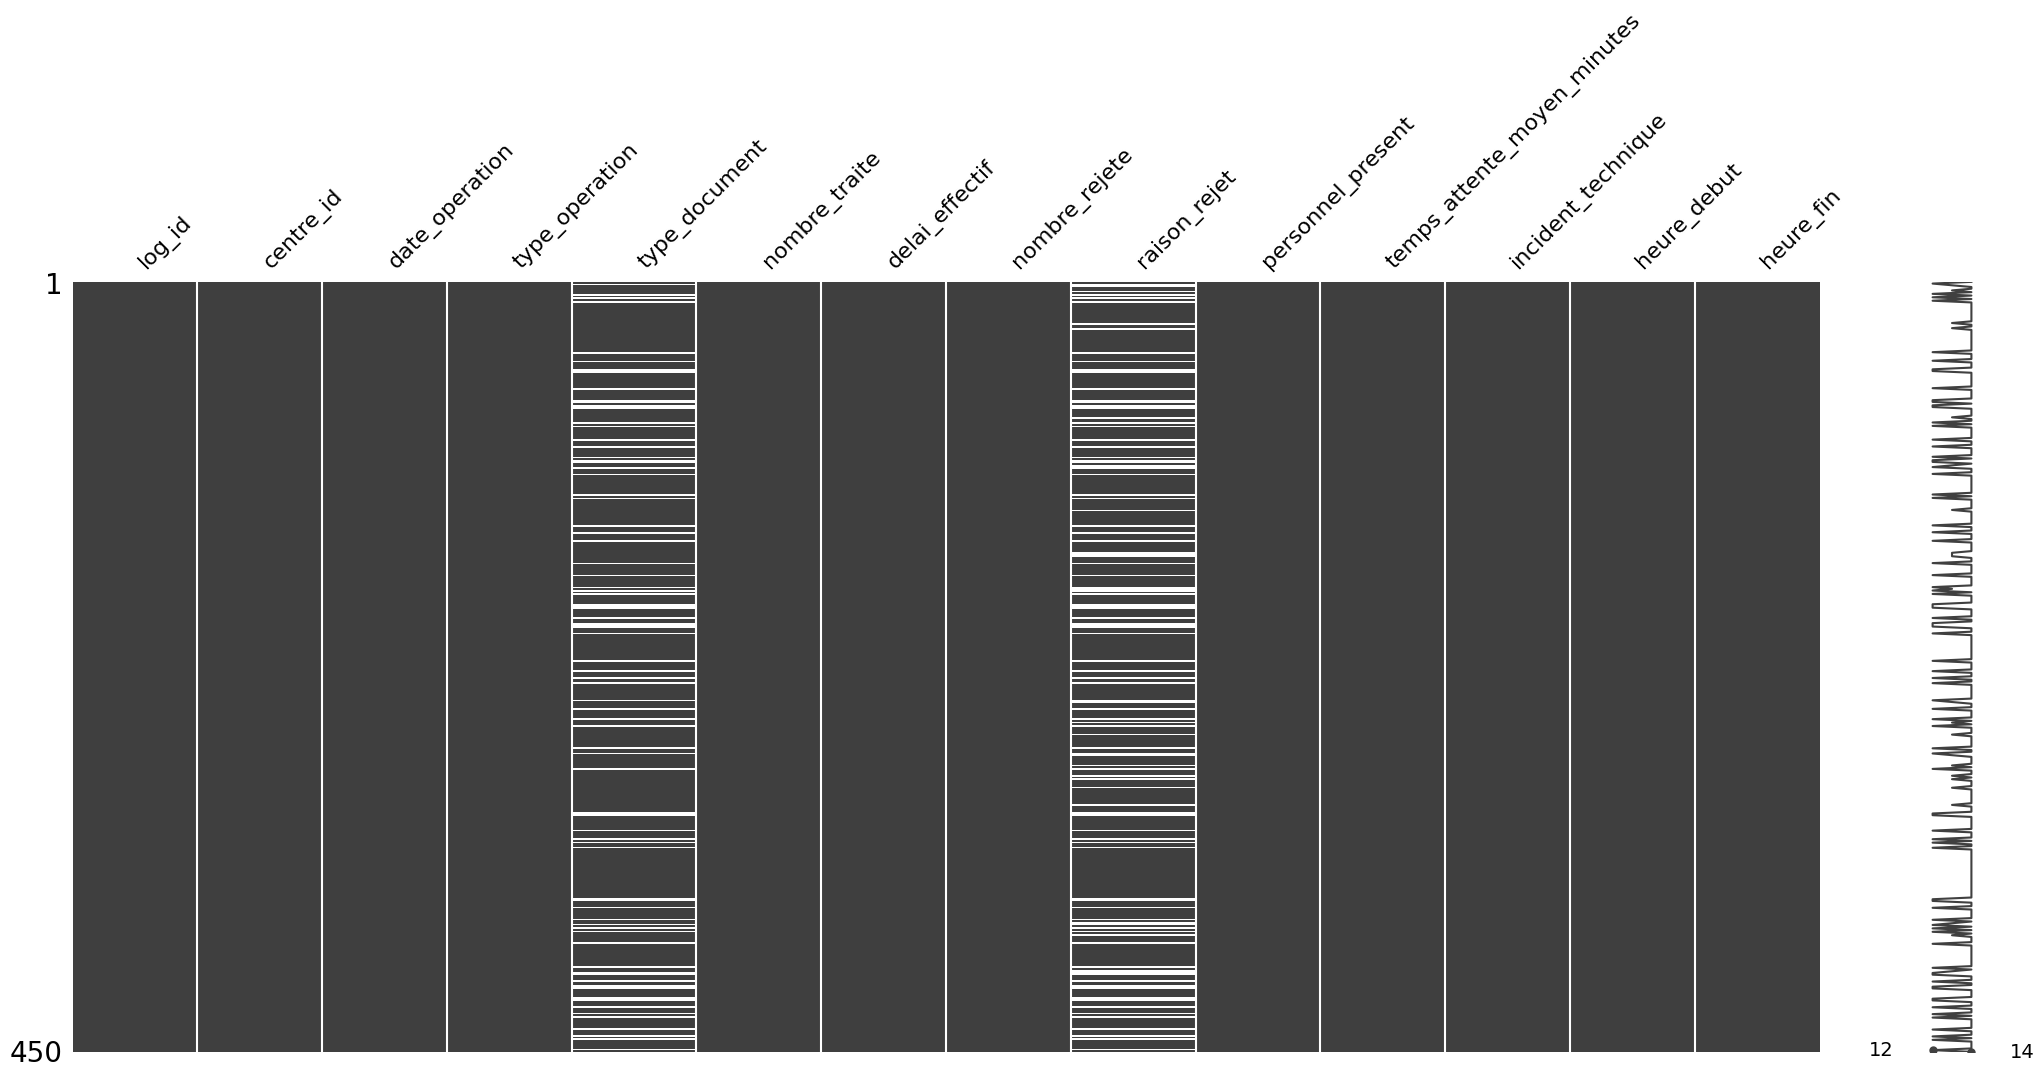

In [4]:
# Fonction pour détecter outliers (IQR)
def detect_outliers_iqr(df, column):
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return len(outliers), lower_bound, upper_bound
    return 0, None, None

# Analyse par dataset
for name, df in datasets.items():
    print(f"\n=== {name.upper()} ===")
    
    # Valeurs manquantes
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    print("Valeurs manquantes (%):")
    print(missing_pct[missing_pct > 0])
    
    # Doublons
    duplicates = df.duplicated().sum()
    print(f"Doublons: {duplicates}")
    
    # Outliers pour colonnes numériques
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        count_out, lb, ub = detect_outliers_iqr(df, col)
        if count_out > 0:
            print(f"Outliers {col}: {count_out} (limites: {lb:.2f} - {ub:.2f})")
    
    # Visualisation NaN (si missingno installé)
    if missing.sum() > 0:
        msno.matrix(df)
        print("Visualisation des NaN affichée.")
    
    print("-" * 100)

## 5. Analyse des Distributions

A ce niveau, on analyse la distribution de certaines variables clés :
- **Volumes de demandes** (par type document, commune, centre).
- **Délais** (temps d'attente, traitement).
- **Capacités** (des centres).

Nous allons utiliser des  histogrammes, boxplots et bar charts pour illustrer les distributions

In [5]:
# Distributions - Volumes de demandes
if 'demandes' in datasets:
    df_dem = datasets['demandes']
    if 'type_document' in df_dem.columns:
        fig = px.histogram(df_dem, x='type_document', title='Distribution des Types de Documents Demandés')
        fig.show()
    
    if 'nombre_demandes' in df_dem.columns:  
        fig = px.box(df_dem, y='nombre_demandes', title='Boxplot des Volumes de Demandes')
        fig.show()

# Distributions - Délais
if 'logs' in datasets:
    df_logs = datasets['logs']
    if 'delai_effectif' in df_logs.columns: 
        fig = px.histogram(df_logs, x='delai_effectif', title='Distribution des Délais de Traitement')
        fig.show()

# Distributions - Capacités
if 'centres' in datasets:
    df_cent = datasets['centres']
    if 'personnel_capacite_jour' in df_cent.columns: 
        fig = px.bar(df_cent, x='nom_centre', y='personnel_capacite_jour', title='Capacités des Centres')
        fig.show()

## 6. Tendances Spatiales et Temporelles

- **Spatiales :** Cartes choroplèthe des demandes/capacité par commune (utilisant lat/lon de details_communes).
- **Temporelles :** Évolution des demandes/délais dans le temps (si dates présentes).

Cela révèle les zones sous-desservies et les pics saisonniers.

In [6]:
# Tendances spatiales - Carte des demandes par commune
if 'communes' in datasets and 'demandes' in datasets:
    df_comm = datasets['communes']
    df_dem = datasets['demandes']
    # Jointure sur 'commune'
    merged = pd.merge(df_dem, df_comm, on='commune', how='left')
    if 'latitude' in merged.columns and 'longitude' in merged.columns and 'nombre_demandes' in merged.columns:
        fig = px.scatter_mapbox(merged, lat='latitude', lon='longitude', size='nombre_demandes', color='region_x',
                                title='Carte des Demandes par Commune',
                                hover_data=['commune', 'nombre_demandes', 'type_document'],
                                size_max=10) 
        fig.update_layout(mapbox_style="open-street-map",
                          mapbox=dict(center=dict(lat=8, lon=1), zoom=6))
        fig.show()

## 7. Synthèse des Constat 

# Synthèse des principaux constats après EDA

**Périmètre analysé**  
L’exploration a porté sur les fichiers principaux : demandes_service_public (600 lignes), documents_administratifs_ext (64 lignes), centres_service (55 centres), details_communes (200), donnees_socioeconomiques (115) et logs_activités (450).  
Des Jointures ont été réalisées sur les clés région / préfecture / commune pour concevoir la carte des demandes par commune.

Les données sont globalement propres (très peu de valeurs manquants, 0 doublons).

### Constat 1 – Forte concentration des demandes dans les zones urbaines et côtières
- Volumes très inégaux : max 2700 demandes par entrée agrégée vs minimum 160  
- Densité de population extrêmement variable (20 à 4690 hab/km², médiane 77)  
- Distance moyenne à la capitale : 230 km, mais forte polarisation autour de Lomé/Maritime probable  

→ Les demandes semblent fortement concentrées dans la région Maritime et les zones à haute densité urbaine, créant une pression très inégale sur le réseau.

### Constat 2 – La Carte d’identité domine très largement les demandes
- Délai moyen de traitement individuel : **22,7 jours** (écart-type 13 jours)  
- Taux de rejet moyen : **7 %** (max 15 %, min 0 %)  
- Âge moyen des demandeurs : **53 ans** (min 18, max 90)  

→ La Carte d’identité représente la majorité des volumes, avec une population relativement âgée qui renouvelle ou demande des duplicatas.

### Constat 3 – Délais de traitement longs et très variables
- Délai moyen agrégé : **19,2 jours** (min 9,2 – max 34,5 jours)  
- Délai individuel moyen : **22,7 jours** (jusqu’à 45 jours maximum)  
- Temps d’attente moyen en centre (logs) : **52 minutes** (max 120 min)  

→ Les délais de traitement sont dispersés selon les types de documents, les périodes et les centres.

### Constat 4 – Hétérogénéité très marquée des capacités des centres
- Capacité moyenne par centre : **126 personnes/jour**  
- Forte dispersion : min 32 → max 358 personnes/jour  
- Nombre de guichets moyen : **5,3** (max 14)  

→ Les centres présentent des capacités extrêmement inégales, ce qui laisse supposer une surcharge probable des grands centres principaux (Lomé, Kara, etc.) et une sous-utilisation ailleurs.

### Constat 5 – Contexte socio-économique contrasté et corrélé aux volumes
- Taux d’urbanisation moyen : seulement **33 %**  
- Revenu moyen par ménage : **~134 000 FCFA** (forte dispersion)  
- Population moyenne par commune : ~51 000 hab (max 424 644)  
→ Le pays reste majoritairement rural avec des inégalités marquées, ce qui explique probablement une concentration des demandes dans les zones urbaines plus riches et mieux connectées.

### Message clé
Le système de délivrance des documents administratifs au Togo est marqué par une **très forte polarisation géographique et capacitaire** autour des zones urbaines côtières, des délais de traitement encore longs, créant des inégalités d’accès et des risques de surcharge localisés.